# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [41]:
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [42]:
# creating base urls for APIs
url = "http://api.openweathermap.org/data/2.5/weather?"

# For each city create URL and the API request
for city in cities:
    
    query_url = f'{url}appid={weather_api_key}&units=imperial&q={city}'
    city_weather = requests.get(query_url).json()
    
    try: 
        
        city_list.append(city_weather['name'])
        cloudiness.append(city_weather['clouds']['all'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        humidity.append(city_weather['main']['humidity'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        wind_speed.append(city_weather['wind']['speed'])
        print(f'Processing {cities.index(city)}: {city}')
    except:
        print(f"We could not find {city}")
        pass

Processing 0: kapaa
Processing 1: port-cartier
We could not find tumannyy
We could not find taolanaro
Processing 4: kungurtug
Processing 5: tuktoyaktuk
Processing 6: aklavik
Processing 7: mamurras
Processing 8: avarua
Processing 9: saint anthony
Processing 10: ekuvukeni
Processing 11: ahipara
Processing 12: lagoa
Processing 13: georgetown
Processing 14: novaya mayna
Processing 15: ushuaia
Processing 16: port hardy
Processing 17: khatanga
Processing 18: atuona
Processing 19: port elizabeth
Processing 20: chicama
Processing 21: port alfred
Processing 22: atar
Processing 23: torbay
Processing 24: morgan city
We could not find tanshui
Processing 26: tasiilaq
Processing 27: punta arenas
Processing 28: butaritari
Processing 29: westport
Processing 30: arraial do cabo
Processing 31: tautira
Processing 32: qaanaaq
Processing 33: mpanda
Processing 34: narsaq
Processing 35: kraslava
Processing 36: zhoucheng
Processing 37: jamestown
Processing 38: vicksburg
Processing 39: san andres
Processing 40

Processing 320: kaeo
Processing 321: buchanan
Processing 322: dothan
Processing 323: mehamn
Processing 324: moron
Processing 325: alofi
Processing 326: muravlenko
Processing 327: kavaratti
Processing 328: union
Processing 329: baisha
Processing 330: skovorodino
We could not find nguiu
Processing 332: jerusalem
Processing 333: san patricio
Processing 334: santa cruz
Processing 335: nizwa
Processing 336: faya
Processing 337: aripuana
Processing 338: kinlochleven
Processing 339: ko samui
Processing 340: alyangula
Processing 341: sangar
Processing 342: yar-sale
Processing 343: sept-iles
We could not find macaboboni
Processing 345: behbahan
Processing 346: talnakh
Processing 347: provideniya
Processing 348: tutoia
Processing 349: klaksvik
Processing 350: vostok
Processing 351: almaznyy
Processing 352: rincon
Processing 353: nouadhibou
Processing 354: binga
Processing 355: bandarbeyla
Processing 356: saint george
Processing 357: lyuban
Processing 358: yeppoon
Processing 359: chunoyar
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
# making dataframe to store weather data
city_weather_df = pd.DataFrame({
    "City": city_list,
    "Cloudiness": cloudiness, 
    "Country": country, 
    "Date": date, 
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
})
city_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,90,US,1612801077,82,22.0752,-159.3190,62.60,9.22
1,Port-Cartier,100,CA,1612801077,74,50.0334,-66.8654,25.00,9.22
2,Kungurtug,24,RU,1612801077,86,50.5994,97.5228,10.33,3.60
3,Tuktoyaktuk,1,CA,1612801077,74,69.4541,-133.0374,-40.00,6.38
4,Aklavik,100,CA,1612801077,67,68.2191,-135.0107,-36.40,3.44
...,...,...,...,...,...,...,...,...,...
560,Lázaro Cárdenas,0,MX,1612801147,57,17.9583,-102.2000,79.50,2.46
561,Eureka,100,US,1612801031,90,40.8021,-124.1637,44.01,2.53
562,Abong Mbang,88,CM,1612801147,16,3.9833,13.1833,92.39,3.69
563,Cap-aux-Meules,100,CA,1612801147,86,47.3821,-61.8597,28.40,31.07


In [44]:
# exporting to a csv file
city_weather_df.to_csv("cities.csv", encoding="utf-8", index=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [45]:
#  Get the indices of cities that have humidity over 100%.
city_weather_df['Humidity'].max()

100

In [46]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.drop(city_weather_df.loc[city_weather_df['Humidity'] > 100].index, inplace=False)

In [47]:
# checking the new cleaned dataset
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,90,US,1612801077,82,22.0752,-159.3190,62.60,9.22
1,Port-Cartier,100,CA,1612801077,74,50.0334,-66.8654,25.00,9.22
2,Kungurtug,24,RU,1612801077,86,50.5994,97.5228,10.33,3.60
3,Tuktoyaktuk,1,CA,1612801077,74,69.4541,-133.0374,-40.00,6.38
4,Aklavik,100,CA,1612801077,67,68.2191,-135.0107,-36.40,3.44
...,...,...,...,...,...,...,...,...,...
560,Lázaro Cárdenas,0,MX,1612801147,57,17.9583,-102.2000,79.50,2.46
561,Eureka,100,US,1612801031,90,40.8021,-124.1637,44.01,2.53
562,Abong Mbang,88,CM,1612801147,16,3.9833,13.1833,92.39,3.69
563,Cap-aux-Meules,100,CA,1612801147,86,47.3821,-61.8597,28.40,31.07


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

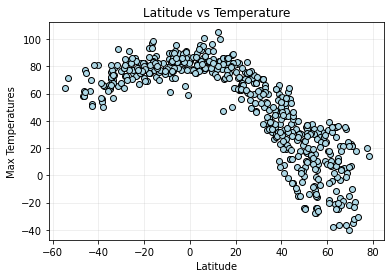

In [48]:
# scatter plot of latitude vs temperature
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Temperature')
plt.ylabel('Max Temperatures')
plt.xlabel('Latitude')
plt.grid(alpha=.25)

plt.savefig('../Images/LatvsTemp.png')
plt.show()

This plot is showing that highest temperatures seem to be closest to the equator, and the farther north you go the colder it gets while the farther south you go the warmer it gets.

## Latitude vs. Humidity Plot

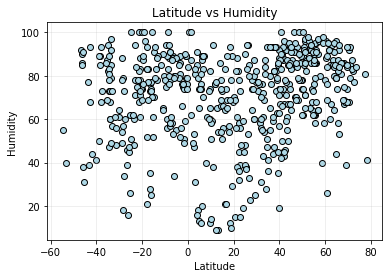

In [49]:
# scatter plot of latitude vs humidity
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(alpha=.25)

plt.savefig('../Images/LatvsHumidity.png')
plt.show()

There does not seem to be any strong correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

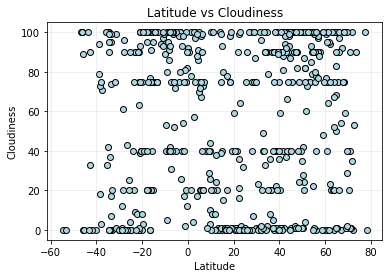

In [50]:
# scatter plot of latitude vs Cloudiness
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(alpha=.25)

plt.savefig('../Images/LatvsCloud.png')
plt.show()

From this plot it seems that cloudiness is not affected by the latitude and is evenly dispersed.  

## Latitude vs. Wind Speed Plot

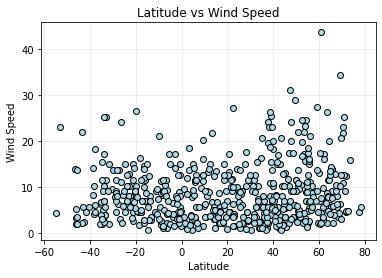

In [51]:
# scatter plot of latitude vs Wind speed
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(alpha=.25)

plt.savefig('../Images/LatvsWind.png')
plt.show()

This plot shows that wind speed widely distributed across the latitude.

## Linear Regression

In [52]:
# creating dataFrames of the northern and southern hemispheres to make it easier for analysis 
north_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0]
south_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

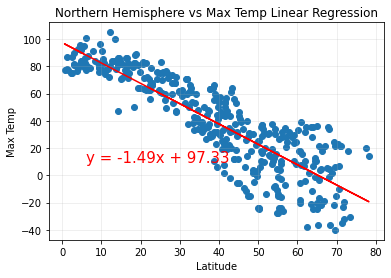

The r-value is: -0.86


In [62]:
# Linear Regression for north hemisphere and max temperature
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere vs Max Temp Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(alpha=.25)
plt.show()                     
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is a strong, negative correlation between the northern hemisphere and max temperature indicating the more north you go away from the equator the colder the max temp is going to be.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

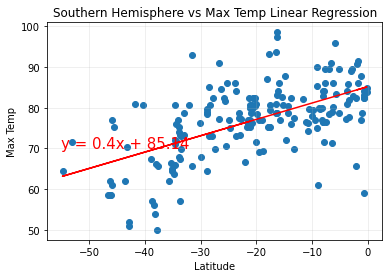

The r-value is: 0.58


In [63]:
# Linear Regression for south hemisphere and max temperature
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")

plt.title("Southern Hemisphere vs Max Temp Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(alpha=.25)
plt.show()   
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is only a moderately strong, positive correlation between the southern hemisphere and max temperature.  This indicates that the more south you go it will likely get warmer.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

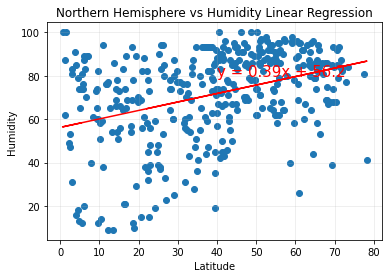

The r-value is: 0.37


In [64]:
# Linear Regression for north hemisphere and humidity
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,80),fontsize=15,color="red")

plt.title("Northern Hemisphere vs Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(alpha=.25)
plt.show()   
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is a weak positive correlation between northern hemisphere and humidity levels, since it is weak we can't conclude much from it. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

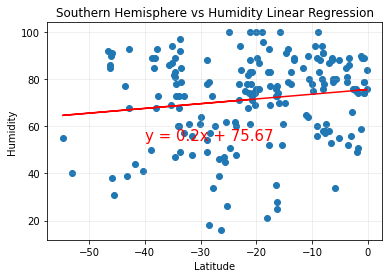

The r-value is: 0.14


In [65]:
# Linear Regression for south hemisphere and humidity
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,54),fontsize=15,color="red")

plt.title("Southern Hemisphere vs Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(alpha=.25)
plt.show()  
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is a very weak, positive correlation between the southern hemisphere and humidity levels, from this we can conclude no correlation between the two. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

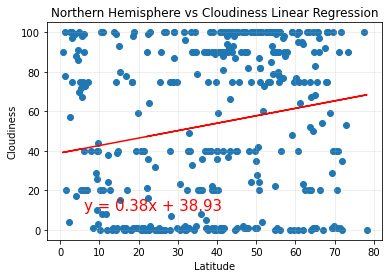

The r-value is: 0.19


In [66]:
# Linear Regression for north hemisphere and cloudiness
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere vs Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(alpha=.25)
plt.show()   
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is a very weak, positive correlation between the northern hemisphere and cloudiness levels. From this we can't conclude a correlation beteween the two. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

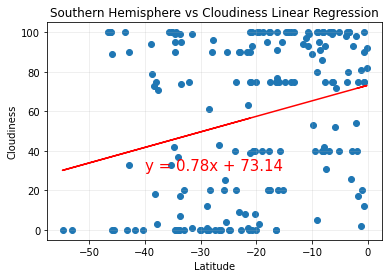

The r-value is: 0.26


In [67]:
# Linear Regression for south hemisphere and cloudiness
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")

plt.title("Southern Hemisphere vs Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(alpha=.25)
plt.show()   
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is a weak, positive correlation between the southern hemisphere and cloudiness levels. From this we can't conclude a strong a correlation between the two.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

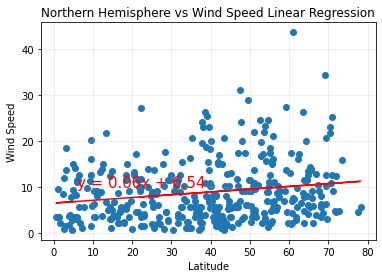

The r-value is: 0.18


In [68]:
# Linear Regression for north hemisphere and wind speed
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere vs Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(alpha=.25)
plt.show()
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is a very weak, positive correlation between the nothern hemisphere and wind speed.  From this we can't conclude any correlation between the two because it is so weak. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

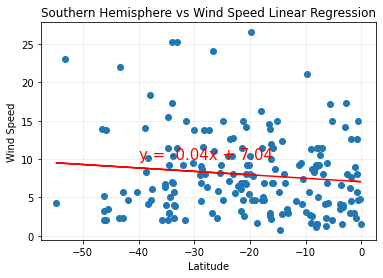

The r-value is: -0.11


In [69]:
# Linear Regression for south hemisphere and wind speed
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

plt.title("Southern Hemisphere vs Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(alpha=.25)
plt.show()
print(f"The r-value is: {round(rvalue, 2)}")